In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("Samples/california_housing_train.csv")
data = data.drop(["longitude","latitude","housing_median_age","median_income","median_house_value"],axis = 1)
data.corr()["total_bedrooms"]

total_rooms       0.928403
total_bedrooms    1.000000
population        0.881169
households        0.980920
Name: total_bedrooms, dtype: float64

In [5]:
data_np = data.to_numpy()
x_np = data.drop(["total_bedrooms"],axis = 1).to_numpy()
x_np = (x_np - np.mean(x_np, axis=0)) / np.std(x_np, axis=0)
y_np = data["total_bedrooms"].to_numpy()
np.dot(x_np[0],x_np[0])

np.float64(1.990442688605896)

[100.827136   -10.88487318 326.00722154] 539.4108235294116


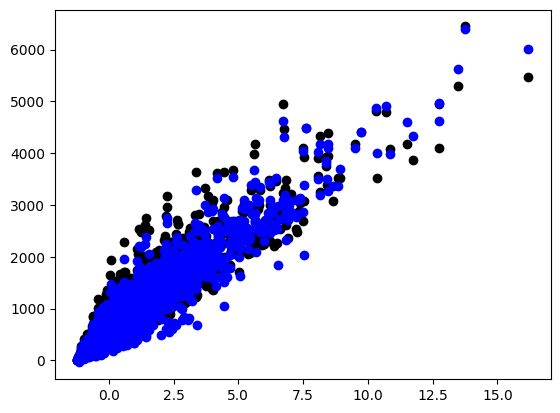

In [6]:
def Gradient_Descent(wv_old, b_old, X, Y, lr):
    lamda = 50
    m = len(X) #Rows
    n = len(X[0]) #Coloms of X
    grad_b = 0.0
    grad_w = np.zeros(n)
    for i in range(m):
        xv = X[i]
        y  = Y[i]
        j  = ((np.dot(xv,wv_old)+b_old)-y)
        for k in range(n):
            grad_w[k] += xv[k] * j
        grad_b += j
        
    w = wv_old * (1-lamda/m) - grad_w/m * lr 
    b = b_old - grad_b/m * lr
    return w,b
w = np.zeros(len(x_np[0]))
b = 0
for i in range(100):
  w,b = Gradient_Descent(w, b, x_np, y_np, 0.3)
print(w,b)
plt.scatter(x_np[:,0],y_np,color="black")
plt.scatter(x_np[:,0],np.dot(x_np, w) + b,color="blue")
plt.show()

[661. 310. 507. ... 201.  14. 263.] [573083.16033802 234286.52413819 507628.42477123 ... 161108.52445772
  14282.21281426 255064.87394964]


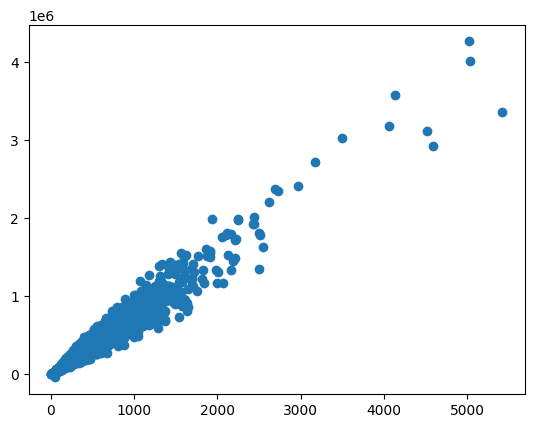

In [7]:
Test_data = pd.read_csv("Samples/california_housing_test.csv")
Test_data = Test_data.drop(["longitude","latitude","housing_median_age","median_income","median_house_value"],axis = 1)
Test_X = Test_data.drop(["total_bedrooms"],axis = 1).to_numpy()
Test_Y = Test_data["total_bedrooms"].to_numpy()
Estmated = np.dot(Test_X, w) + b
print(Test_Y,Estmated)
plt.scatter(Test_Y,Estmated)